<a href="https://colab.research.google.com/github/micattia/Capstone/blob/master/04_Bivariate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load pandas component for data science
import pandas as pd

#load Apple data 
linkAP1 = 'https://raw.githubusercontent.com/micattia/Capstone/master/AppleFinalData.csv'
dfAPPL = pd.read_csv(linkAP1)
linkAP2 = 'https://raw.githubusercontent.com/micattia/Capstone/master/AppleNewsStock.csv'
dfAPPLnews = pd.read_csv(linkAP2)

#load Microsoft data
linkMS1 = 'https://raw.githubusercontent.com/micattia/Capstone/master/MicrosoftFinalData.csv'
dfMS = pd.read_csv(linkMS1)
linkMS2 = 'https://raw.githubusercontent.com/micattia/Capstone/master/MicrosoftNewsStock.csv'
dfMSnews = pd.read_csv(linkMS2)

# Changing Some column names for the Microsoft main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfMS = dfMS.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})

# Changing Some column names for the Apple main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfAPPL = dfAPPL.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})



In [0]:
#loading required libraries 
#==========================
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [4]:
dfMS.head()

,Date,Open,High,Low,Close,Adj_Close,Compound,Neg,Neu,Pos
0,12/1/2006,29.23,29.30,28.90,29.12,29.12,0.0000,0.000,0.000,0.000
1,12/4/2006,29.23,29.52,29.17,29.33,29.33,-0.7783,0.137,0.863,0.000
2,12/5/2006,29.36,29.40,29.03,29.13,29.13,0.0000,0.000,0.000,0.000
3,12/6/2006,29.10,29.13,28.87,28.99,28.99,0.9003,0.051,0.847,0.102
4,12/7/2006,28.96,29.07,28.81,28.85,28.85,0.6597,0.000,0.810,0.190


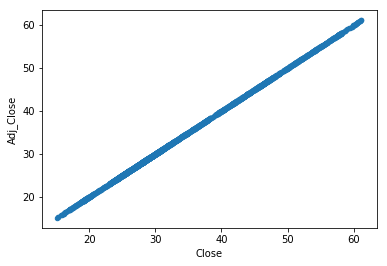

In [6]:
dfMS.plot.scatter(x='Close',y='Adj_Close')

In [51]:
ls = dfMS[[Close,Open]]

#ls = dfMS.iloc[:,0:3]


NameError: ignored

In [49]:
ls.head()
#ls.plot.scatter(x='Date',y='Close')

AttributeError: ignored